In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.models.load_model('model.h5')

In [19]:
directory_data_train = "data/train"
directory_data_test = "data/test"

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                             rotation_range=40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

################################################################
train_ds = train_datagen.flow_from_directory(
    directory = directory_data_train,
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123  
)
validation_ds = val_datagen.flow_from_directory(
    directory= directory_data_train,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123 
)
test_ds = train_datagen.flow_from_directory(
    directory = directory_data_test,
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [21]:
import matplotlib.pyplot as plt

# Đánh giá mô hình
loss, accuracy = model.evaluate(validation_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9011 - loss: 0.4711
Loss: 0.49629995226860046, Accuracy: 0.876086950302124


In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,558,796 (9.76 MB)

 Trainable params: 298,250 (1.14 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

 Optimizer params: 2 (12.00 B)

In [23]:
import pickle

# Tải lại lịch sử huấn luyện
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

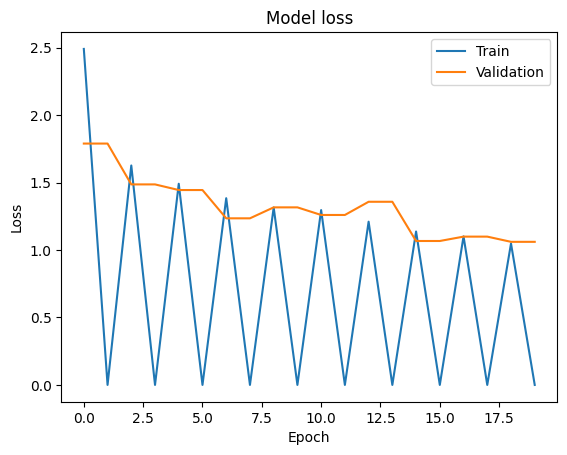

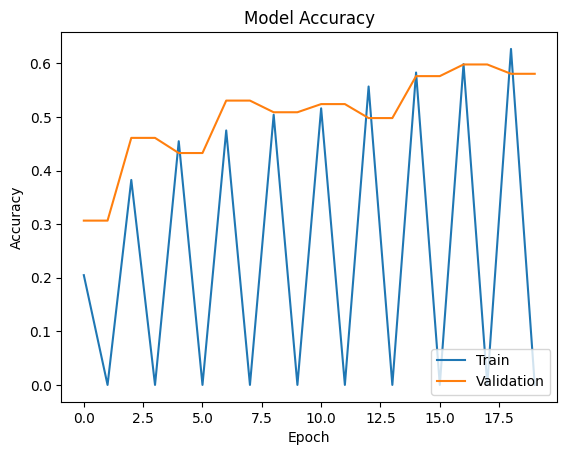

In [24]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


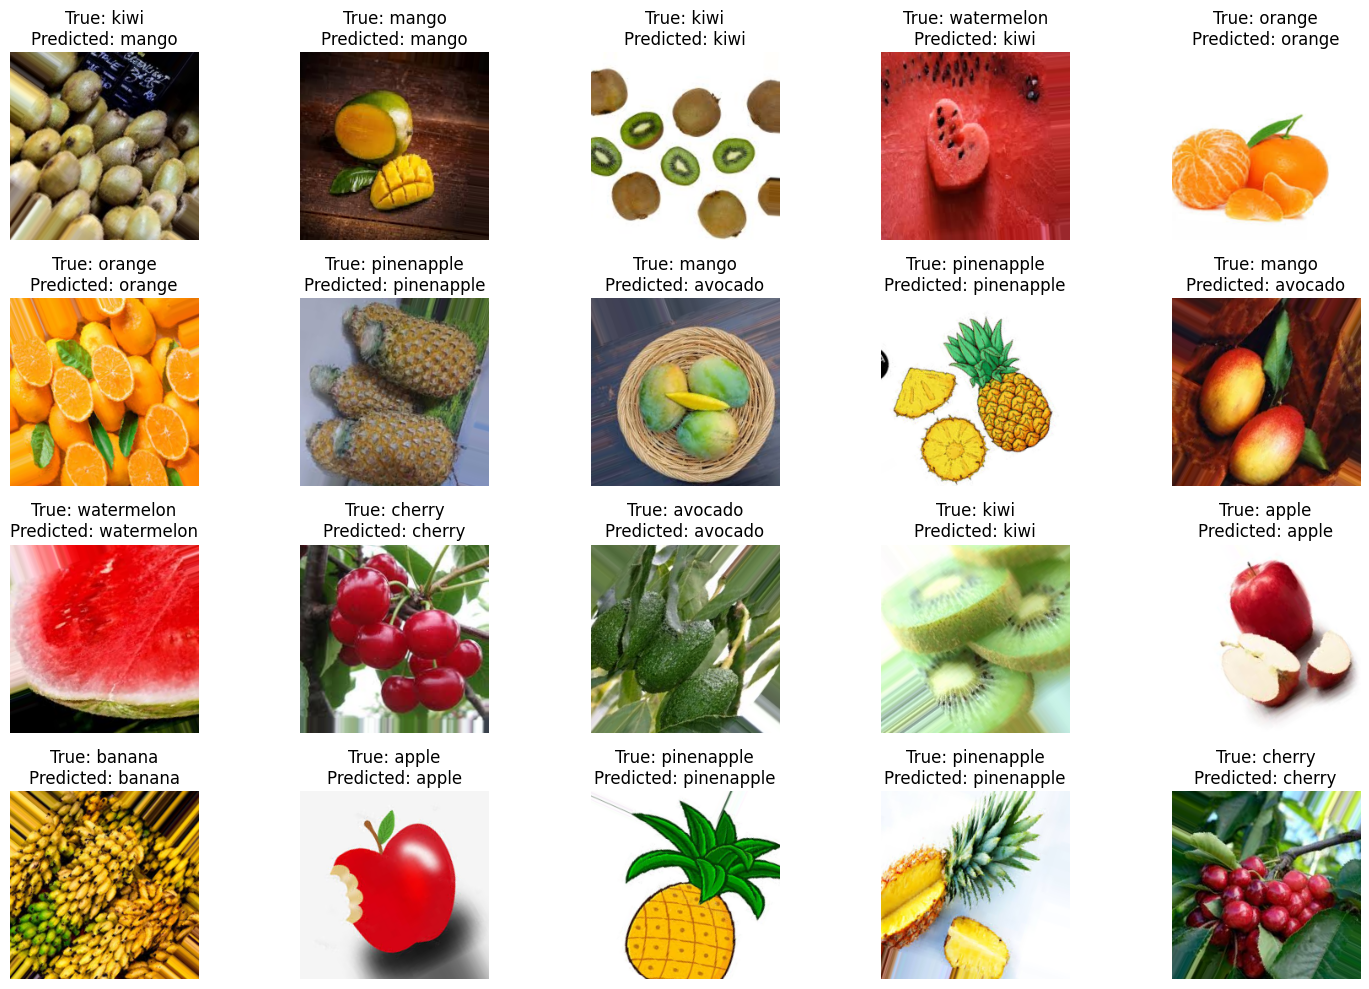

In [25]:
import numpy as np
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_fruit(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thay đổi kích thước để phù hợp với đầu vào của mô hình
    img_array /= 255.0  # Chuẩn hóa dữ liệu

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_label = ([('apple', 0), ('avocado', 1), ('banana', 2), ('cherry', 3), ('kiwi', 4), ('mango', 5), ('orange', 6), ('pinenapple', 7), ('strawberries', 8), ('watermelon', 9)])

    class_label = {v: k for k, v in class_label}
    
    return class_label[class_index]

# Ví dụ dự đoán
print(predict_fruit('data/predict/img_41.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
avocado


In [27]:
# from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# # Bước 1: Dự đoán nhãn cho dữ liệu kiểm tra
# y_pred_probs = model.predict(test_ds)  # Dự đoán xác suất của các nhãn
# y_pred = y_pred_probs.argmax(axis=1)   # Chuyển đổi xác suất thành nhãn dự đoán

# # Bước 2: Lấy nhãn thực tế từ test_ds
# y_true = []  # Danh sách để lưu nhãn thực tế
# for _, labels in test_ds:
#     y_true.extend(labels.argmax(axis=1))  # Chuyển nhãn thực tế từ one-hot thành nhãn dạng số

# # Bước 3: Tính toán các chỉ số đánh giá
# precision = precision_score(y_true, y_pred, average='weighted')
# # recall = recall_score(y_true, y_pred, average='weighted')
# # f1 = f1_score(y_true, y_pred, average='weighted')

# # In kết quả
# print(f"Precision: {precision:.4f}")
# # print(f"Recall: {recall:.4f}")
# # print(f"F1-Score: {f1:.4f}")

# # Bước 4: In báo cáo chi tiết
# class_label = ([('apple', 0), ('avocado', 1), ('banana', 2), ('cherry', 3), ('kiwi', 4), ('mango', 5), ('orange', 6), ('pinenapple', 7), ('strawberries', 8), ('watermelon', 9)])

# report = classification_report(y_true, y_pred, target_names=class_label)
# print(report)


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step


KeyboardInterrupt: 